In [1]:
import cv2 as cv
import math
import numpy as np
from matplotlib import pyplot as plt
import random as rng

In [2]:
sift = cv.SIFT_create()
bf = cv.BFMatcher()

# Computers

In [3]:
com_l = cv.imread("computers_left.png")
com_r = cv.imread("computers_right.png")
com_l = cv.cvtColor(com_l, cv.COLOR_BGR2GRAY)
com_r = cv.cvtColor(com_r, cv.COLOR_BGR2GRAY)

In [4]:
kp1, des1 = sift.detectAndCompute(com_l,None)
kp2, des2 = sift.detectAndCompute(com_r,None)
out1 = np.zeros((com_l.shape))
out1 = cv.drawKeypoints(com_l, kp1, out1)
out2 = np.zeros((com_r.shape))
out2 = cv.drawKeypoints(com_r, kp2, out2)

Text(0.5, 1.0, 'Right Key Points')

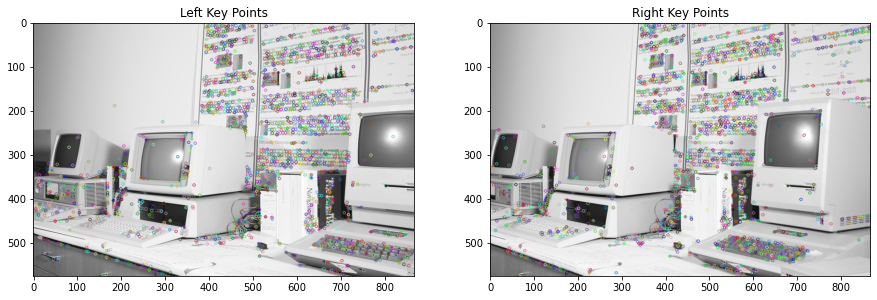

In [5]:
figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(out1, cmap='gray')
ax[0].set_title("Left Key Points")
ax[1].imshow(out2, cmap='gray')
ax[1].set_title("Right Key Points")

In [6]:
matches = bf.knnMatch(des1,des2,k=2)

points_left = []
points_right = []
for m,n in matches:
    if(m.distance < 0.75*n.distance):
        points_right.append(kp2[m.trainIdx].pt)
        points_left.append(kp1[m.queryIdx].pt)
points_right = np.int32(points_right)
points_left = np.int32(points_left)

In [7]:
F_comp, mask = cv.findFundamentalMat(points_left,points_right,cv.FM_LMEDS)

In [8]:
points_left = points_left[mask.ravel()==1]
points_right = points_right[mask.ravel()==1]

In [9]:
def drawlines(img1,img2,lines,pts1,pts2):
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

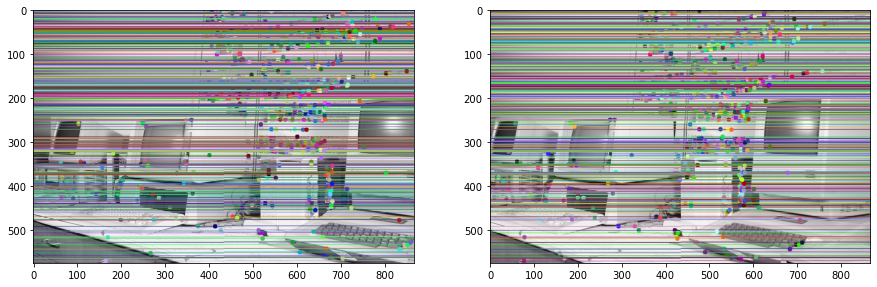

In [10]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(points_right.reshape(-1,1,2), 2,F_comp)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(com_l,com_r,lines1,points_left,points_right)

lines2 = cv.computeCorrespondEpilines(points_left.reshape(-1,1,2), 1,F_comp)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(com_r,com_l,lines2,points_right,points_left)

figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(img5, cmap='gray')
ax[1].imshow(img3, cmap='gray')

In [65]:
def disp_conj(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
#         img1 = cv.cvtColor(param[0],cv.COLOR_GRAY2BGR)
#         img2 = cv.cvtColor(param[1],cv.COLOR_GRAY2BGR)
        img1 = param[0].copy()
        img2 = param[1].copy()
        line = cv.computeCorrespondEpilines(np.array([[x,y]]), 1,param[2])
        line = line[0][0]
        c = param[0].shape[1]
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -line[2]/line[1]])
        x1,y1 = map(int, [c, -(line[2]+line[0]*c)/line[1]])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img2 = cv.circle(img2,(x,y),5,color,-1)
        cv.imshow('Right',img1)
        cv.imshow('Left',img2)

## Interface for Computers

In [67]:
com_l = cv.imread("computers_left.png")
com_r = cv.imread("computers_right.png")
cv.imshow('Left', com_l)
cv.imshow('Right',com_r)
cv.setMouseCallback('Left', disp_conj, [com_r,com_l,F_comp])
while True:
    key=cv.waitKey(1)
    if key==27: #if key pressed is esc
        break
cv.destroyAllWindows()

# Daft Punk

In [39]:
img1 = cv.imread("daft_punk_left.jpg")
img2 = cv.imread("daft_punk_right.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

In [40]:
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
out1 = np.zeros((img1.shape))
out1 = cv.drawKeypoints(img1, kp1, out1)
out2 = np.zeros((img2.shape))
out2 = cv.drawKeypoints(img2, kp2, out2)

Text(0.5, 1.0, 'Right Key Points')

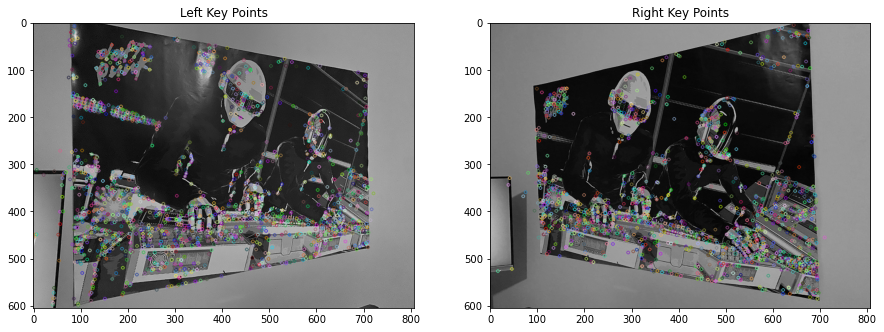

In [41]:
figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(out1, cmap='gray')
ax[0].set_title("Left Key Points")
ax[1].imshow(out2, cmap='gray')
ax[1].set_title("Right Key Points")

In [42]:
matches = bf.knnMatch(des1,des2,k=2)

points_left = []
points_right = []
for m,n in matches:
    if(m.distance < 0.75*n.distance):
        points_right.append(kp2[m.trainIdx].pt)
        points_left.append(kp1[m.queryIdx].pt)
points_right = np.int32(points_right)
points_left = np.int32(points_left)

In [43]:
F_daft, mask = cv.findFundamentalMat(points_left,points_right,cv.FM_LMEDS)

In [44]:
points_left = points_left[mask.ravel()==1]
points_right = points_right[mask.ravel()==1]

In [60]:
def drawlines(img1,img2,lines,pts1,pts2):
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

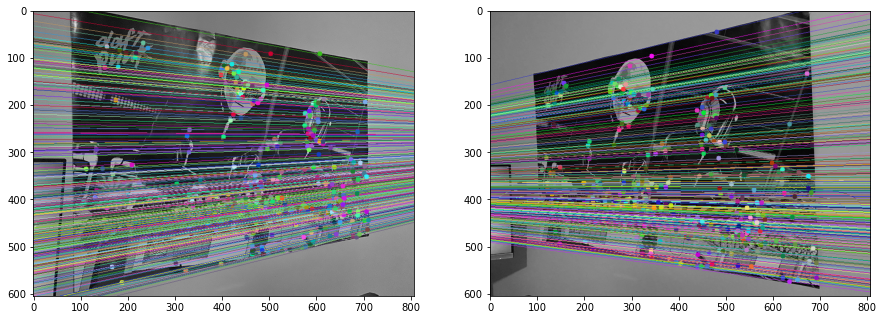

In [46]:
lines1 = cv.computeCorrespondEpilines(points_right.reshape(-1,1,2), 2,F_daft)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,points_left,points_right)

lines2 = cv.computeCorrespondEpilines(points_left.reshape(-1,1,2), 1,F_daft)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,points_right,points_left)

figure, ax = plt.subplots(1, 2,figsize=(15,15))
ax[0].imshow(img5, cmap='gray')
ax[1].imshow(img3, cmap='gray')

## Interface for Daft Punk

In [64]:
img1 = cv.imread("daft_punk_left.jpg")
img2 = cv.imread("daft_punk_right.jpg")
cv.imshow('Left', img1)
cv.imshow('Right', img2)
cv.setMouseCallback('Left', disp_conj, [img2,img1,F_daft])
while True:
    key=cv.waitKey(1)
    if key==27: #if key pressed is esc
        break
cv.destroyAllWindows()